MIT License

Copyright (c) 2024 Mohammed Yasin

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

> **WARNING**
>
> Don't use "Run All". Run the cells one after another manually.

In [1]:
!git clone https://github.com/ultralytics/ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 42198, done.
remote: Counting objects: 100% (1765/1765), done.
remote: Compressing objects: 100% (915/915), done.
remote: Total 42198 (delta 1107), reused 1353 (delta 841), pack-reused 40433 (from 1)
Receiving objects: 100% (42198/42198), 32.31 MiB | 20.83 MiB/s, done.
Resolving deltas: 100% (31056/31056), done.


In [2]:
%cd /content/ultralytics

/content/ultralytics


In [3]:
!git reset --hard abd391b63338b79cebee808b6679498dcc94956f

HEAD is now at abd391b6 `ultralytics 8.2.55` adaptive `tflite_support` logic (#14385)


In [4]:
# Download patch
!wget https://gist.githubusercontent.com/Y-T-G/8f4fc0b78a0a559a06fe84ae4f359e6e/raw/05a9086de3825e15ebef3830229273982c3ad9ec/add_head.patch

--2024-09-24 06:58:35--  https://gist.githubusercontent.com/Y-T-G/8f4fc0b78a0a559a06fe84ae4f359e6e/raw/05a9086de3825e15ebef3830229273982c3ad9ec/add_head.patch
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11258 (11K) [text/plain]
Saving to: ‘add_head.patch’

add_head.patch      100%[===================>]  10.99K  --.-KB/s    in 0s      

2024-09-24 06:58:35 (48.0 MB/s) - ‘add_head.patch’ saved [11258/11258]



In [5]:
!git apply add_head.patch

In [6]:
!pip install -e .

Obtaining file:///content/ultralytics
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ultralytics (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.2.55-0.editable-py3-none-any.whl size=22998 sha256=d88e6e11b5f0cbdedbf24c9ef2dc42f6ccadb30a1a755b46f0df14a5813a4820
  Stored in directory: /tmp/pip-ephem-wheel-cache-vj6uklgq/wheels/9a/cd/d5/95912172899f8ec640166ff6eef49156b1b00d6b2ade4a3cb1
Successfully built ultralytics


In [7]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [8]:
from roboflow import Roboflow
rf = Roboflow(api_key="sSGbeYt0jKUfwfbcUSgP")
project = rf.workspace("bags-whnme").project("new-backpacks-g2bfj")
version = project.version(2)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.55, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to New-Backpacks-2 in yolov8:: 100%|██████████| 2106/2106 [00:00<00:00, 4579.32it/s]


In [11]:
!mkdir -p /content/datasets/New-Backpacks-2
!mv New-Backpacks-2/** /content/datasets/New-Backpacks-2/
!mv /content/datasets/New-Backpacks-2/data.yaml /content/datasets

mv: cannot stat 'New-Backpacks-2/**': No such file or directory
mv: cannot stat '/content/datasets/New-Backpacks-2/data.yaml': No such file or directory


# Train a model with frozen COCO backbone

In [12]:
# Reset runtime
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

# Wait for restart and then continue

{'status': 'ok', 'restart': True}

> **WARNING**
>
> Wait for the Colab kernel to crash and restart after running the above cell, before continuing.

In [ ]:
%cd /content/ultralytics

In [2]:
from ultralytics import YOLO
import torch
import copy

In [3]:
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

100%|██████████| 6.25M/6.25M [00:00<00:00, 59.8MB/s]
/content/ultralytics/ultralytics/nn/tasks.py:785: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, 

In [4]:
# Keep a copy of old state dict for sanity check
old_dict = copy.deepcopy(model.state_dict())

In [5]:
# We should freeze all but the last layer
model.state_dict().keys()

odict_keys(['model.model.0.conv.weight', 'model.model.0.bn.weight', 'model.model.0.bn.bias', 'model.model.0.bn.running_mean', 'model.model.0.bn.running_var', 'model.model.0.bn.num_batches_tracked', 'model.model.1.conv.weight', 'model.model.1.bn.weight', 'model.model.1.bn.bias', 'model.model.1.bn.running_mean', 'model.model.1.bn.running_var', 'model.model.1.bn.num_batches_tracked', 'model.model.2.cv1.conv.weight', 'model.model.2.cv1.bn.weight', 'model.model.2.cv1.bn.bias', 'model.model.2.cv1.bn.running_mean', 'model.model.2.cv1.bn.running_var', 'model.model.2.cv1.bn.num_batches_tracked', 'model.model.2.cv2.conv.weight', 'model.model.2.cv2.bn.weight', 'model.model.2.cv2.bn.bias', 'model.model.2.cv2.bn.running_mean', 'model.model.2.cv2.bn.running_var', 'model.model.2.cv2.bn.num_batches_tracked', 'model.model.2.m.0.cv1.conv.weight', 'model.model.2.m.0.cv1.bn.weight', 'model.model.2.m.0.cv1.bn.bias', 'model.model.2.m.0.cv1.bn.running_mean', 'model.model.2.m.0.cv1.bn.running_var', 'model.mod

In [6]:
# Add a callback to put the frozen layers in eval mode to prevent BN values
# from changing.
def put_in_eval_mode(trainer, n_layers=22):
  for i, (name, module) in enumerate(trainer.model.named_modules()):
    if name.endswith("bn") and int(name.split('.')[1]) < n_layers:
      module.eval()
      module.track_running_stats = False
      # print(name, " put in eval mode.")

In [7]:
model.add_callback("on_train_epoch_start", put_in_eval_mode)
model.add_callback("on_pretrain_routine_start", put_in_eval_mode)

In [8]:
# Train the model. Freeze the first 22 layers [0-21].
results = model.train(data='/content/datasets/data.yaml', freeze=22, epochs=100, imgsz=640)

New https://pypi.org/project/ultralytics/8.2.100 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=22, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

100%|██████████| 755k/755k [00:00<00:00, 14.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

/content/ultralytics/ultralytics/engine/trainer.py:267: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning /content/datasets/New-Backpacks-2/train/labels... 734 images, 0 backgrounds, 0 corrupt: 100%|██████████| 734/734 [00:00<00:00, 834.55it/s]


train: New cache created: /content/datasets/New-Backpacks-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.16 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/New-Backpacks-2/valid/labels... 207 images, 0 backgrounds, 0 corrupt: 100%|██████████| 207/207 [00:00<00:00, 1532.22it/s]

val: New cache created: /content/datasets/New-Backpacks-2/valid/labels.cache


Plotting labels to /content/ultralytics/runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /content/ultralytics/runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      0.917      1.949      1.442         42        640:  74%|███████▍  | 34/46 [05:01<01:46,  8.88s/it]


KeyboardInterrupt: 

In [ ]:
def compare_dicts(state_dict1, state_dict2):
    # Compare the keys
    keys1 = set(state_dict1.keys())
    keys2 = set(state_dict2.keys())

    if keys1 != keys2:
        print("Models have different parameter names.")
        return False

    # Compare the values (weights)
    for key in keys1:
        if not torch.equal(state_dict1[key], state_dict2[key]):
            print(f"Weights for parameter '{key}' are different.")
            if "bn" in key and "22" not in key:
              state_dict1[key] = state_dict2[key]

In [ ]:
# Compare the dicts. Changes should only be in layer 21 and above
compare_dicts(old_dict, model.state_dict())

Weights for parameter 'model.model.22.cv3.1.2.weight' are different.
Weights for parameter 'model.model.22.cv2.0.1.conv.weight' are different.
Weights for parameter 'model.model.22.cv2.1.0.bn.running_var' are different.
Weights for parameter 'model.model.22.cv2.0.0.bn.bias' are different.
Weights for parameter 'model.model.22.cv3.0.0.bn.weight' are different.
Weights for parameter 'model.model.22.cv3.1.0.conv.weight' are different.
Weights for parameter 'model.model.22.cv2.2.1.bn.bias' are different.
Weights for parameter 'model.model.22.cv3.2.0.bn.bias' are different.
Weights for parameter 'model.model.22.cv2.1.1.bn.running_mean' are different.
Weights for parameter 'model.model.22.cv2.0.1.bn.weight' are different.
Weights for parameter 'model.model.22.cv3.1.0.bn.bias' are different.
Weights for parameter 'model.model.22.cv2.2.0.bn.running_mean' are different.
Weights for parameter 'model.model.22.cv2.2.0.conv.weight' are different.
Weights for parameter 'model.model.22.cv3.1.1.bn.bia

In [ ]:
new_state_dict = dict()

In [ ]:
#  Increment the head number by 1 in the state_dict
for k, v in model.state_dict().items():
  if k.startswith("model.model.22"):
    new_state_dict[k.replace("model.22", "model.23")] = v
  # else:
  #   new_state_dict[k] = v

In [ ]:
# Save the current state_dict
torch.save(new_state_dict, "yolov8n_lp.pth")

# Create new architecture with extra head and load custom weights

In [ ]:
from ultralytics import YOLO
import torch

In [ ]:
# Edit this to the number of new classes you added
added_classes = 2 # Added 2 new classes.
nc = 80 + added_classes # Total no. of classes

# Update yaml with the number of added_classes
!sed -i "52s/.*/  - \[\[15, 18, 21\], 1, Detect, \[{added_classes}\]\]/g" ultralytics/cfg/models/v8/yolov8n-2xhead.yaml
!sed -i "5s/.*/nc: {nc}/g" ultralytics/cfg/models/v8/yolov8n-2xhead.yaml

In [ ]:
model_2 = YOLO('ultralytics/cfg/models/v8/yolov8n-2xhead.yaml', task="detect").load('yolov8n.pt')

Transferred 355/440 items from pretrained weights


In [ ]:
model_2.state_dict().keys()

odict_keys(['model.model.0.conv.weight', 'model.model.0.bn.weight', 'model.model.0.bn.bias', 'model.model.0.bn.running_mean', 'model.model.0.bn.running_var', 'model.model.0.bn.num_batches_tracked', 'model.model.1.conv.weight', 'model.model.1.bn.weight', 'model.model.1.bn.bias', 'model.model.1.bn.running_mean', 'model.model.1.bn.running_var', 'model.model.1.bn.num_batches_tracked', 'model.model.2.cv1.conv.weight', 'model.model.2.cv1.bn.weight', 'model.model.2.cv1.bn.bias', 'model.model.2.cv1.bn.running_mean', 'model.model.2.cv1.bn.running_var', 'model.model.2.cv1.bn.num_batches_tracked', 'model.model.2.cv2.conv.weight', 'model.model.2.cv2.bn.weight', 'model.model.2.cv2.bn.bias', 'model.model.2.cv2.bn.running_mean', 'model.model.2.cv2.bn.running_var', 'model.model.2.cv2.bn.num_batches_tracked', 'model.model.2.m.0.cv1.conv.weight', 'model.model.2.m.0.cv1.bn.weight', 'model.model.2.m.0.cv1.bn.bias', 'model.model.2.m.0.cv1.bn.running_mean', 'model.model.2.m.0.cv1.bn.running_var', 'model.mod

In [ ]:
state_dict = torch.load("yolov8n_lp.pth")

In [ ]:
state_dict.keys()

dict_keys(['model.model.23.cv2.0.0.conv.weight', 'model.model.23.cv2.0.0.bn.weight', 'model.model.23.cv2.0.0.bn.bias', 'model.model.23.cv2.0.0.bn.running_mean', 'model.model.23.cv2.0.0.bn.running_var', 'model.model.23.cv2.0.0.bn.num_batches_tracked', 'model.model.23.cv2.0.1.conv.weight', 'model.model.23.cv2.0.1.bn.weight', 'model.model.23.cv2.0.1.bn.bias', 'model.model.23.cv2.0.1.bn.running_mean', 'model.model.23.cv2.0.1.bn.running_var', 'model.model.23.cv2.0.1.bn.num_batches_tracked', 'model.model.23.cv2.0.2.weight', 'model.model.23.cv2.0.2.bias', 'model.model.23.cv2.1.0.conv.weight', 'model.model.23.cv2.1.0.bn.weight', 'model.model.23.cv2.1.0.bn.bias', 'model.model.23.cv2.1.0.bn.running_mean', 'model.model.23.cv2.1.0.bn.running_var', 'model.model.23.cv2.1.0.bn.num_batches_tracked', 'model.model.23.cv2.1.1.conv.weight', 'model.model.23.cv2.1.1.bn.weight', 'model.model.23.cv2.1.1.bn.bias', 'model.model.23.cv2.1.1.bn.running_mean', 'model.model.23.cv2.1.1.bn.running_var', 'model.model.2

In [ ]:
# Load state_dict of the custom trained model head. Layer 23.
model_2.load_state_dict(state_dict, strict=False)

_IncompatibleKeys(missing_keys=['model.model.0.conv.weight', 'model.model.0.bn.weight', 'model.model.0.bn.bias', 'model.model.0.bn.running_mean', 'model.model.0.bn.running_var', 'model.model.1.conv.weight', 'model.model.1.bn.weight', 'model.model.1.bn.bias', 'model.model.1.bn.running_mean', 'model.model.1.bn.running_var', 'model.model.2.cv1.conv.weight', 'model.model.2.cv1.bn.weight', 'model.model.2.cv1.bn.bias', 'model.model.2.cv1.bn.running_mean', 'model.model.2.cv1.bn.running_var', 'model.model.2.cv2.conv.weight', 'model.model.2.cv2.bn.weight', 'model.model.2.cv2.bn.bias', 'model.model.2.cv2.bn.running_mean', 'model.model.2.cv2.bn.running_var', 'model.model.2.m.0.cv1.conv.weight', 'model.model.2.m.0.cv1.bn.weight', 'model.model.2.m.0.cv1.bn.bias', 'model.model.2.m.0.cv1.bn.running_mean', 'model.model.2.m.0.cv1.bn.running_var', 'model.model.2.m.0.cv2.conv.weight', 'model.model.2.m.0.cv2.bn.weight', 'model.model.2.m.0.cv2.bn.bias', 'model.model.2.m.0.cv2.bn.running_mean', 'model.model

In [ ]:
# Output of COCO model
model_coco = YOLO("yolov8n.pt")

# For consistency
model_coco.model.names = {k:k for k in model_coco.names.keys()}

result_coco = model_coco.predict("test.jpg")[0]


image 1/1 e:\Downloads\GitHub\ultralytics\test.jpg: 384x640 3 0s, 7 2s, 1 11, 393.0ms
Speed: 5.0ms preprocess, 393.0ms inference, 44.9ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
# Output of custom LP model
model_lp = YOLO("best.pt")

# For plotting consistency, change all class names to class numbers
model_lp.model.names = {k:k for k in model_lp.names.keys()}

result_lp = model_lp.predict("test.jpg")[0]


image 1/1 e:\Downloads\GitHub\ultralytics\test.jpg: 384x640 1 0, 1 1, 723.3ms
Speed: 9.4ms preprocess, 723.3ms inference, 7.7ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
# Output of the new model
result_merged = model_2.predict("test.jpg")[0]


image 1/1 e:\Downloads\GitHub\ultralytics\test.jpg: 384x640 3 0s, 7 2s, 1 11, 1 80, 1 81, 300.6ms
Speed: 3.0ms preprocess, 300.6ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def show_output(images):
    image = np.vstack(images)
    fig = plt.figure()
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    fig.set_size_inches((5,15))
    ax.imshow(image[...,::-1])

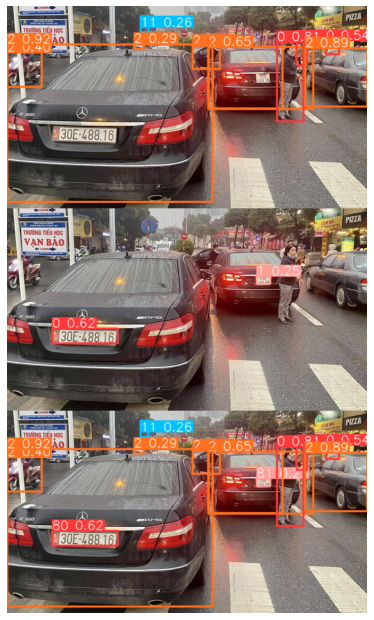

In [ ]:
show_output([result_coco.plot(), result_lp.plot(), result_merged.plot()])

In [ ]:
# Save .pt of merged model
model_2.ckpt = {"model": model_2.model}
model_2.save("merged.pt")

# Load saved merged model. No additional steps required.
model_2 = YOLO("merged.pt")